In [3]:
import numpy as np
np.__version__


'2.3.5'

In [ ]:
import matplotlib.pyplot as plt

In [5]:
from IPython.display import clear_output

In [6]:
def step_function(x):
    if x < thres:
        return 0
    else:
        return 1

In [7]:
def gen_training_data(data_point):
    x1 = np.random.random(data_point)
    x2 = np.random.random(data_point)
    y = ((x1 + x2) > 1).astype(int)
    training_set = [((x1[i], x2[i]), y[i]) for i in range(len(x1))]
    
    return training_set

In [8]:
thres = 0.5
w = np.array([0.3, 0.9])
lr = 0.1
data_point = 100
epoch = 10
training_set = gen_training_data(data_point)

In [9]:
training_set[0:5]

[((np.float64(0.9010650390521937), np.float64(0.8436762928846065)),
  np.int64(1)),
 ((np.float64(0.6196307184064167), np.float64(0.8677459636896194)),
  np.int64(1)),
 ((np.float64(0.45015665871834043), np.float64(0.6406857090661722)),
  np.int64(1)),
 ((np.float64(0.9078715553491233), np.float64(0.8805129428869876)),
  np.int64(1)),
 ((np.float64(0.5141826943764058), np.float64(0.789077148586214)),
  np.int64(1))]

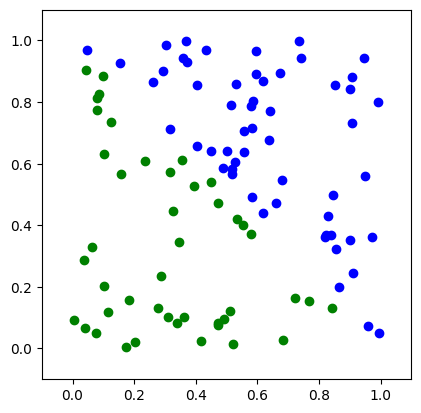

In [10]:
plt.figure(0)
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

for x,y in training_set:
    if y == 1:
        plt.plot(x[0], x[1], 'bo')
    else:
        plt.plot(x[0], x[1], 'go')
plt.show()

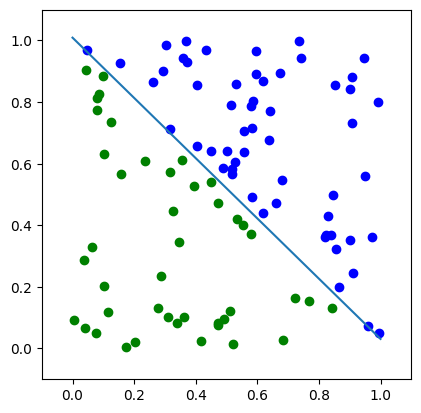

In [11]:
%matplotlib inline
from time import sleep
#Learning start!
plt.figure(0)
plt.ylim((-0.1, 1.1))
plt.xlim((-0.1, 1.1))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
xx = np.linspace(0, 1, 50)
for i in range(epoch):
    cnt = 0
    
    for x,y in training_set:
        clear_output(wait=True)
        
        u = sum(x*w)
        error = y - step_function(u)
        for index, value in enumerate(x):
            w[index] += lr*error*value
        
        
        for xs, ys in training_set[0:cnt]:
            plt.ylim((-0.1, 1.1))
            plt.xlim((-0.1, 1.1))
            ax = plt.gca()
            ax.set_aspect('equal', adjustable='box')
            if ys == 1:
                plt.plot(xs[0], xs[1], 'bo')
            else:
                plt.plot(xs[0], xs[1], 'go')
        
        yy = -w[1]/w[0]*xx + thres/w[0]   # <== w[0]*yy + w[1]*xx = thres

        plt.plot(xx,yy)
        plt.show()
        cnt=cnt+1
        sleep(0.01)
        